<h4><em><b><u>WordCloud : </u> </b> EN SIK KULLANILAN KELİMELERİ BULMAK İCİN BİR GORSELLEŞTİRME  </em> </h4>


In [61]:
import pandas as pd
import sys
from stop_words import StopWords
from nltk.corpus import stopwords

In [40]:
sys.path.append("..")

In [15]:
df = pd.read_csv("../processed_datas/Processed_Hacettepe_Movie_Review.csv")
df.head(3)

,id,comment,sentiment
0,0,brad bitt fılmde cesur savascı rolunu yapamam...,Negative
1,1,Her şeyden önce film üzerine yorumumu iki böl...,Negative
2,2,süper bir film gidin izleyin süper,Positive


In [68]:
stopwords_tr = StopWords("../turkce_stop_words.txt").load_get_stopwords()
stopwords_tr_nltk = stopwords.words("turkish")
stopwords_tr.extend(["film", "filmi", "filmde", "filmin", "filmden"])

In [57]:
for i in range(2):
    print(df.comment[i])

 brad bitt fılmde cesur savascı rolunu yapamamıs.davranısları ve hareketlerıyle cesur savascı yerıne bır sokak serserısı gıbı gorunuyor. fılm de klasık anlamda bı savas fılmı.sacma sapan bı destan..sacma sapan savaslar.. 
 Her şeyden önce film üzerine yorumumu iki bölüme ayıracağım; 1- Bir bilim kurgu filmi olarak V for Vendetta: Karakterleri ve senaryosu orjinal karanlık atmosferli ve bol sosyal mesaj soslu klasik bir fantastik aksiyondan daha öte bir film değil. Film olarak fena olmasa da filmi benim gözümde klasik bir aksiyon filmi seviyesine düşürüen şey şudur; 2- Bir çizgiroman uyarlaması olarak V for Vendetta: Sıkı bir çizgiroman fanatiği olarak Alan Moore'un bu kült statüsüne bileğinin kakkıyla ulaşmış çizgiromanını hem daha önce ingilizce hem de şimdi ülkemizde çıkan türkçe baskısıyla okudum. Filmi benim gözümden düşüren şey film çok ama çok daha etkileyici ve derin çekilebilecekken ortaya cilalı bir klasik aksiyon filminin çıkmış olması ve çizgiromanın çok daha kaliteli bir fi

In [63]:
from wordcloud import WordCloud
texts = "".join([comment for comment in df.comment])


wordcloud = WordCloud(stopwords=stopwords_tr_nltk).generate(texts)

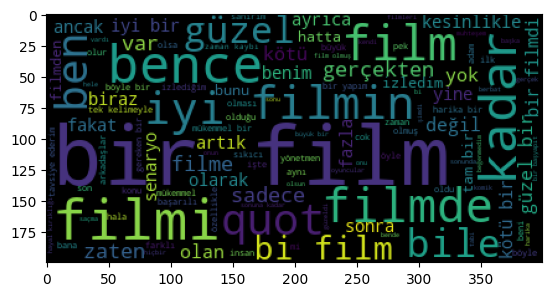

In [64]:
plt.imshow(wordcloud)

In [69]:
from wordcloud import WordCloud
texts = "".join([comment for comment in df.comment])


wordcloud = WordCloud(stopwords=stopwords_tr).generate(texts)

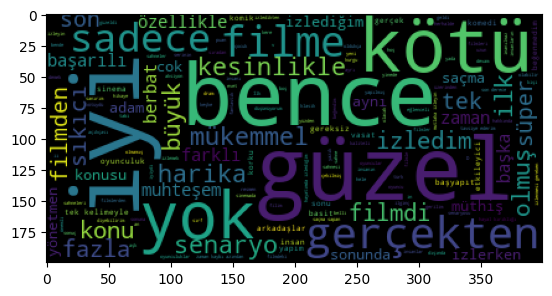

In [70]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)

MESELA SADECE BURADAKİ WORDCLOUDDA GORUP FARKLI STOPWORDS' UN AZ OLDUGUNU ANLADIM VE "Bİ" KELİMESİ DE COK KULLANILMIŞ.
ONUN DA STOPWORDS OLDUGUNU DUSUNDUGUM İCİN ONU DA YAZDIM VE KENDİ STOPWORDS SINIFIMI OLUSTURMAYA KARAR VERDIM.


POZİTİF YORUMLARIN WORDCLOUDU


In [47]:
positive_df = df[df["sentiment"] == "Positive"]

In [58]:
texts_positive = "".join([comment for comment in positive_df.comment])
wordcloud_positive = WordCloud(stopwords=stopwords_tr).generate(texts_positive)

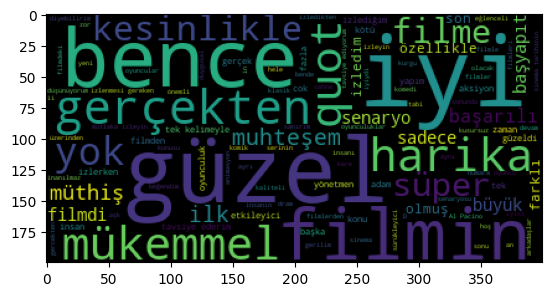

In [59]:
plt.imshow(wordcloud_positive)

["film" , "filmi" , "filmde" , "filmin"] bunlardaki eklerin gereksizligi goz onune carpıyor. stemming yapılabilir.


ASAGIDAKI GIBI ZEMBEREK BASARILI BIR SEKİLDE HALLEDİYOR. AKLIMIZDA BULUNSUN.


In [60]:
from zemberek import TurkishMorphology
from zemberek import TurkishTokenizer
cumle = "film filmli filmde filmin "
tokenizer = TurkishTokenizer.DEFAULT

tokens = tokenizer.tokenize(cumle)

morphology = TurkishMorphology.create_with_defaults()

for token in tokens:
    word = token.content
    analysis = morphology.analyze(word)
    lemmas = [str(result.item.root) for result in analysis]

    if lemmas:

        lemma = lemmas[0]
    else:

        lemma = word

    print(f"Kelime: {word}, Kök: {lemma}")

2024-05-26 16:10:46,145 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 7.10881233215332

Kelime: film, Kök: film
Kelime: filmli, Kök: film
Kelime: filmde, Kök: film
Kelime: filmin, Kök: film
